<a href="https://colab.research.google.com/github/siobhanloughney/ds1002-sel6nzy/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [5]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.

even_odd <- function(x){ if (x %% 2 == 1) {
  sprintf("The integer %i is odd", x)
  } else {
    sprintf("The integer %i is even", x)
  }
}
even_odd(8)
even_odd(37)

[1] "The integer 8 is even"

[1] "The integer 37 is odd"

In [20]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.

mean_value <- function(var1 = 68, var2 = 62, var3 = 1, var4 = 11) {
  m <- c(var1, var2, var3, var4)
  mval = mean(m)
  mval
}

mean_value()
mean_value(0, 65, 4, 6)

[1] 35.5

[1] 18.75

## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

In [55]:
#
library(tidyverse)
library(ggplot2)
install.packages("gapminder")
library(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [102]:
msleep_data <- data.frame(msleep %>%
   filter(bodywt >= 30)%>%
   select(order, sleep_total)%>%
   group_by(order)%>%
   summarize(avg_sleep = mean(sleep_total)))
msleep_data

order,avg_sleep
<chr>,<dbl>
Artiodactyla,4.820000
Carnivora,10.250000
Cetacea,4.500000
Cingulata,18.100000
Perissodactyla,3.466667
Primates,8.850000
Proboscidea,3.600000


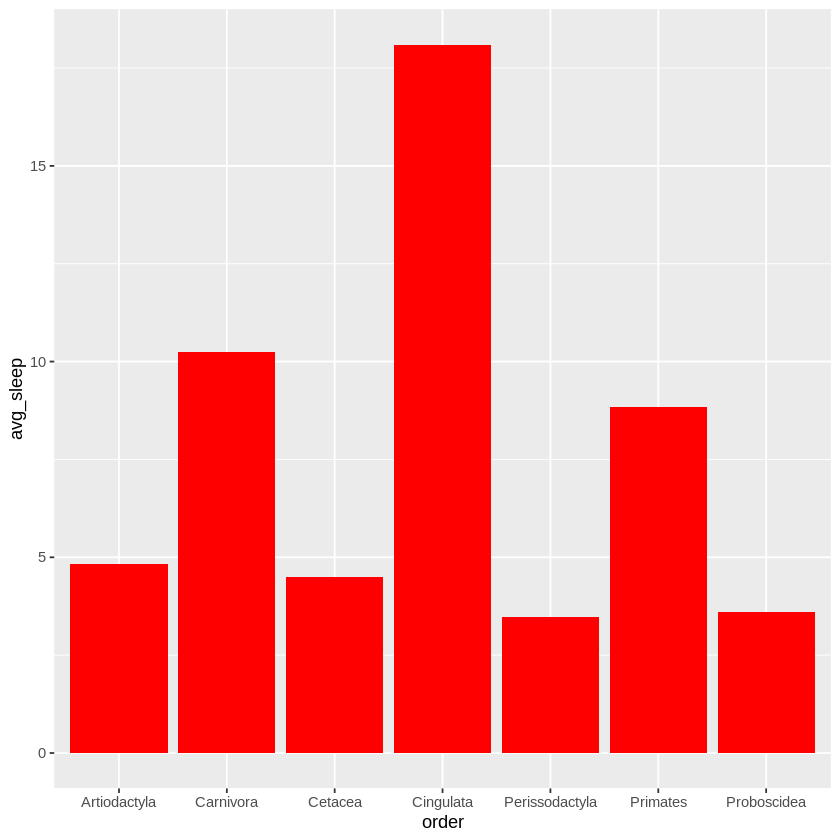

In [120]:
ggplot(msleep_data, aes(x = order, y = avg_sleep)) +
geom_col(fill="red")

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [167]:
social_media_users <- read_csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv")
nrow(social_media_users[duplicated(social_media_users), ])
social_media_users <- social_media_users[!duplicated(social_media_users), ]
nrow(social_media_users[duplicated(social_media_users), ])


Rows: 1318 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): username, full_name, birthdate, email, continent, last_login, inter...
dbl (1): followers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 318

[1] 0

In [168]:
#
smu_no_na <- social_media_users %>% drop_na(last_login,birthdate)


In [169]:
#
smu <- smu_no_na%>%
  arrange(desc(followers))

smu[c(1:10) , ]

username,full_name,birthdate,email,continent,followers,last_login,interests
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
lleckeyb6,Lynne Leckey,4/19/1998,lleckeyb6@tripadvisor.com,SA,99977,3/14/2021,sports
spharoaha2,Staci Pharoah,9/2/1985,spharoaha2@sfgate.com,NA,99905,10/26/2023,sports
cduftondy,Celisse Dufton,8/24/1995,cduftondy@ox.ac.uk,OC,99707,9/26/2021,sports
dbartalin77,Desiree Bartalin,8/23/1993,dbartalin77@usda.gov,AF,99618,5/30/2022,music
grivardmp,Gwen Rivard,9/12/1982,grivardmp@google.com.hk,OC,99526,4/4/2020,music
mraggitt9g,Morgan Raggitt,11/16/1992,mraggitt9g@home.pl,NA,99508,11/12/2021,music
wbenese7,Wain Benes,3/9/1998,wbenese7@ebay.com,NA,99400,10/1/2021,travel
kmorriceht,Kitti Morrice,6/3/1995,kmorriceht@privacy.gov.au,SA,98936,3/24/2021,sports
smacdonnell7o,Shoshanna MacDonnell,9/12/2002,smacdonnell7o@toplist.cz,AS,98760,7/20/2021,music


In [181]:
#

smu2 <- data.frame(smu %>%
   group_by(continent)%>%
   summarize(n=n()))
smu2

continent,n
<chr>,<int>
AF,70
AS,111
EU,77
OC,95
SA,69
NA,228
